In [1]:
# Import the required packages for cleaning data

In [2]:
import re
import jieba 
import pandas as pd

In [3]:
df=pd.read_csv('train_set.csv',index_col='id')

In [4]:
# Define stopwords for improving accuracy

In [5]:
Stopword='的了和是就都而及與著或一個沒有我們你們妳們他們她們是否上下只乎些如果因為所以這麼也亦仍從此于但且'

In [6]:
# Remove the digit, alphabet, space, symbols and stopwords

In [7]:
df['Clean']=df['content'].str.findall('[^\da-zA-Z\s\W_%s]'%Stopword)

In [8]:
row,col=df.shape

In [9]:
# Using jieba to "tokenize" the Chinese text

In [10]:
for i in range(row):
	df.iloc[i,2]=''.join(df.iloc[i,2])
	df.iloc[i,2]=' '.join(jieba.cut(df.iloc[i,2],cut_all=False))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HoT\AppData\Local\Temp\jieba.cache
Loading model cost 0.608 seconds.
Prefix dict has been built succesfully.


In [11]:
# Split a part of train set for validating the model

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.iloc[:,2].values
y=df.iloc[:,0].values

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [15]:
# Using CountVectorizer for feature extraction

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
Count=CountVectorizer()
Count_train=Count.fit_transform(X_train)
Count_test=Count.transform(X_test)

In [18]:
# Uisng Naive Bayes for supervised leaning model
# It is a powerful and efficient tools for text mining

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
nb_classifer=MultinomialNB()
nb_classifer.fit(Count_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
print('Accuracy for the train set = {}'.format(nb_classifer.score(Count_train,y_train)))
print('Accuracy for the test set (split from the train set) = {}'.format(nb_classifer.score(Count_test,y_test)))

Accuracy for the train set = 0.9993579454253612
Accuracy for the test set (split from the train set) = 0.993581514762516


In [22]:
 # Vertification of test set

In [23]:
# Cleaning the test set for prediction 
# The procedure is similar to clean the train set

In [24]:
dft=pd.read_csv('test_set.csv',index_col='id')

In [25]:
dft['Clean']=dft['content'].str.findall('[^\da-zA-Z\s\W_%s]'%Stopword)

In [26]:
row1,col1=dft.shape

In [27]:
for i in range(row1):
	dft.iloc[i,1]=''.join(dft.iloc[i,1])
	dft.iloc[i,1]=' '.join(jieba.cut(dft.iloc[i,1],cut_all=False))

In [28]:
X_rtest=dft.iloc[:,1].values

In [29]:
Count_rtest=Count.transform(X_rtest)

In [30]:
# Result: prediction of given dataset

In [31]:
pred=nb_classifer.predict(Count_test)

In [32]:
import matplotlib.pyplot as plt
% matplotlib inline

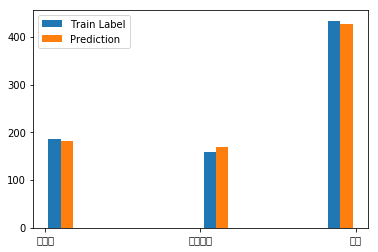

In [33]:
plt.hist(list(zip(y_train,pred)),label=['Train Label','Prediction'])
plt.legend()

In [34]:
# Y=The distribution of predicted and train labels are similar.